In [1]:
import pandas as pd
df = pd.read_csv('heart.csv')
print(df)

     Age  Sex  ChestPainType  RestBloodPressure  SerumCholestoral  \
0     70    1              4                130               322   
1     67    0              3                115               564   
2     57    1              2                124               261   
3     64    1              4                128               263   
4     74    0              2                120               269   
5     65    1              4                120               177   
6     56    1              3                130               256   
7     59    1              4                110               239   
8     60    1              4                140               293   
9     63    0              4                150               407   
10    59    1              4                135               234   
11    53    1              4                142               226   
12    44    1              3                140               235   
13    61    1              1      

データを訓練用データと検証用データに分割

In [2]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

モデルの作成と精度確認

In [3]:
#学習データを用いてモデル作成
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=0)
model = model.fit(X_train, y_train)

In [4]:
#検証データで予測実行
test = model.predict(X_test)

In [9]:
#識別率確認
from sklearn.metrics import (roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score)
fpr, tpr, thresholds = roc_curve(y_test, test, pos_label=1)
AUC = auc(fpr, tpr)
accuracy = accuracy_score(y_test, test)
precision = precision_score(y_test, test)
recall = recall_score(y_test, test)
fScore = f1_score(y_test, test)

print('AUC: ' + str(AUC))
print('Accuracy: ' + str(accuracy))
print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print('f score: ' + str(fScore))

AUC: 0.694249649368864
Accuracy: 0.7037037037037037
Precision: 0.6590909090909091
Recall: 0.6304347826086957
f score: 0.6444444444444444


決定木の可視化

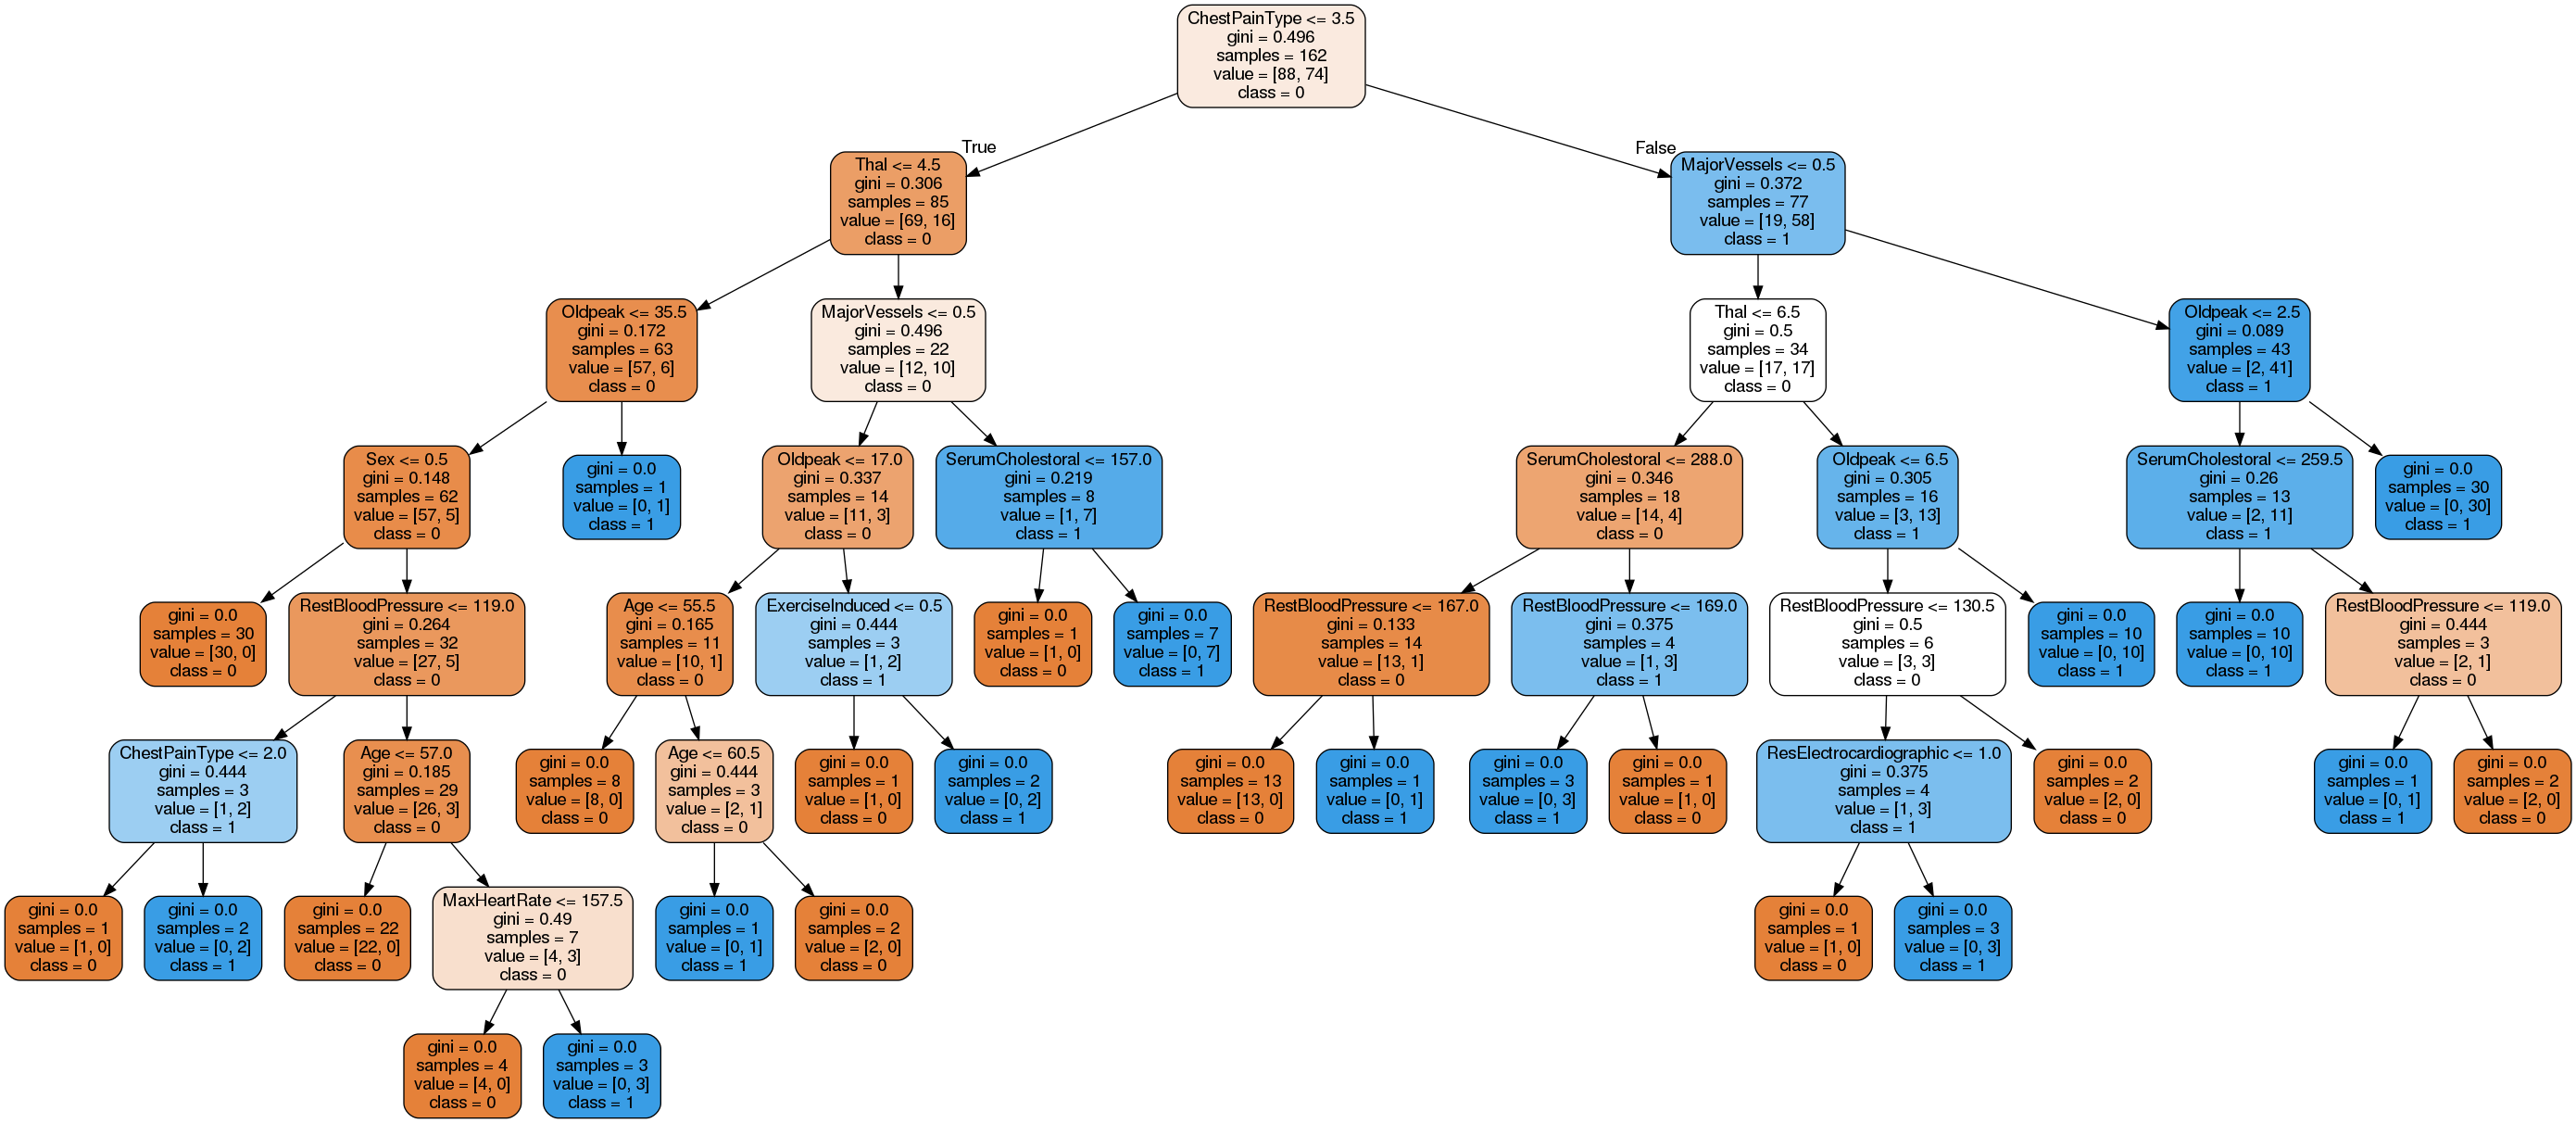

In [6]:
import pydotplus
from sklearn.externals.six import StringIO
dot_data = StringIO()
tree.export_graphviz(model,
                     out_file=dot_data,
                     feature_names=X_train.columns,
                     class_names=['0', '1'],
                     filled=True,
                     rounded=True
                    )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

from IPython.display import Image
Image(graph.create_png())

In [7]:
#pdf出力
graph.write_pdf("heart_graph.pdf")

True